# By: Vibhuti Vardhan Mishra
# Exploratory Data Analysis
#GRIPJUNE2021 #TSF

# EDA on dataset ‘SampleSuperstore'

Finding out the weak areas where performance can be improved and what steps can be taken.

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# importing the data.

df = pd.read_csv('/home/vibhuti/Downloads/SampleSuperstore.csv')

In [3]:
df.head()
#viewing first 5 entries

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape
#number of rows and colums

(9994, 13)

In [5]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#statistical properties of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#unique count of each feature
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
#checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null or missing values.

In [9]:
#total sales of the store
df['Sales'].sum()

2297200.8603

In [10]:
#total profit of the store
df['Profit'].sum()

286397.0217

In [11]:
#checking for duplicate values
df.duplicated().sum()

17

In [12]:
#removing duplicate entries
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
df.drop(['Postal Code'], axis='columns', inplace=True)

Postal codes is an insignificant column so we have dropped it.

In [14]:
#replacing spaces in the column names with '_'
df.columns = df.columns.str.replace(' ','_')

# Analysis of Shipment Mode

In [15]:
df.Ship_Mode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [16]:
ship = df.groupby('Ship_Mode')
ship.size()

Ship_Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
dtype: int64

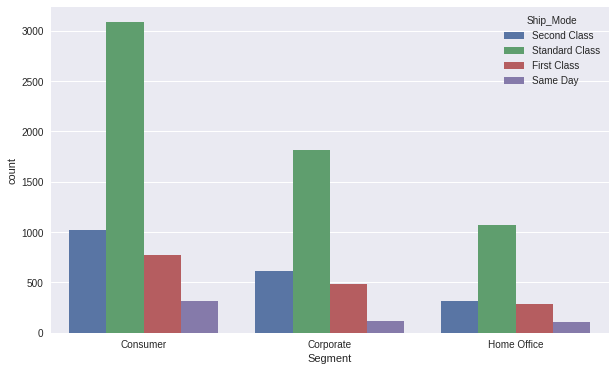

In [17]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
sn.countplot(x='Segment',hue='Ship_Mode',data=df)
plt.show()

# Analysis of Different Segments of Customer  

In [18]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
seg = df.groupby('Segment')
seg.sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


<ipython-input-20-db1df5375627>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seg['Sales','Profit'].sum().plot.bar()


<Figure size 720x432 with 0 Axes>

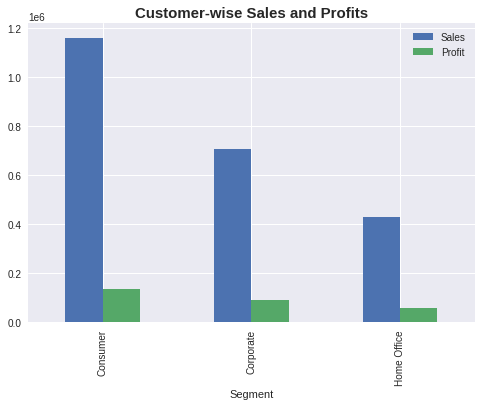

In [20]:
plt.figure(figsize=(10,6))
seg['Sales','Profit'].sum().plot.bar()
plt.title('Customer-wise Sales and Profits',fontweight='bold',fontsize=15)
plt.show()

# Region-wise Analysis

In [21]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

There are 4 regions so we can analyze region wise performance.

In [22]:
reg_trans = df.Region.value_counts()
reg_trans

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [23]:
reg = df.groupby('Region')
reg.sum()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


In [24]:
reg.size()

Region
Central    2323
East       2848
South      1620
West       3203
dtype: int64

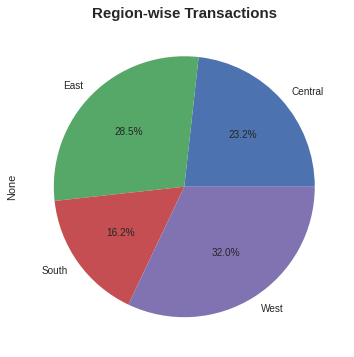

In [25]:
plt.figure(figsize=(10,6))
reg.size().plot.pie(autopct="%.1f%%")
plt.title('Region-wise Transactions',fontweight='bold',fontsize=15)
plt.show()

<ipython-input-26-d9d134997b56>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reg['Sales','Profit'].sum().plot.bar()


Text(0.5, 1.0, 'Region-wise Sales and Profits')

<Figure size 720x432 with 0 Axes>

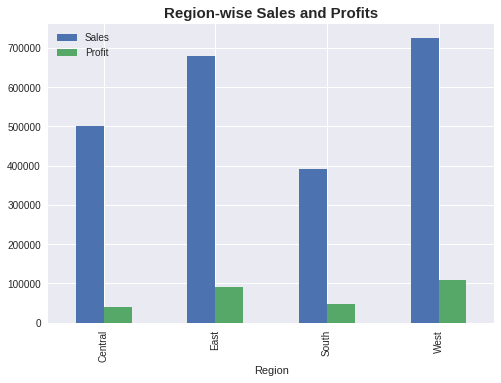

In [26]:
plt.figure(figsize=(10,6))
reg['Sales','Profit'].sum().plot.bar()
plt.title('Region-wise Sales and Profits',fontweight='bold',fontsize=15)

# Product-wise Analysis

In [27]:
#category-wise
prod = df.groupby('Category')
prod.sum()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,18451.2728
Office Supplies,719047.0320,22906,947.80,122490.8008
Technology,836154.0330,6939,244.40,145454.9481


In [28]:
prod.size()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
dtype: int64

<ipython-input-29-bf3601036edd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prod['Sales','Profit'].sum().plot.bar()


<Figure size 720x432 with 0 Axes>

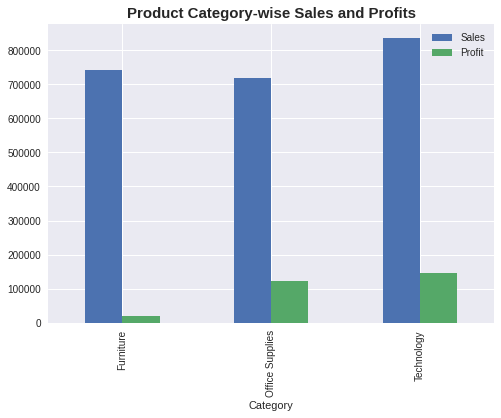

In [29]:
plt.figure(figsize=(10,6))
prod['Sales','Profit'].sum().plot.bar()
plt.title('Product Category-wise Sales and Profits',fontweight='bold',fontsize=15)
plt.legend(loc = 1)
plt.show()

From the graph it can be clearly seen that Furniture category has a high sales but very low profit.               
Technology category experience highest sales and profit.

In [30]:
#sub-category-wise
prod_sub = df.groupby('Sub-Category')
prod_sub.size()

Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
dtype: int64

<AxesSubplot:xlabel='Sub-Category'>

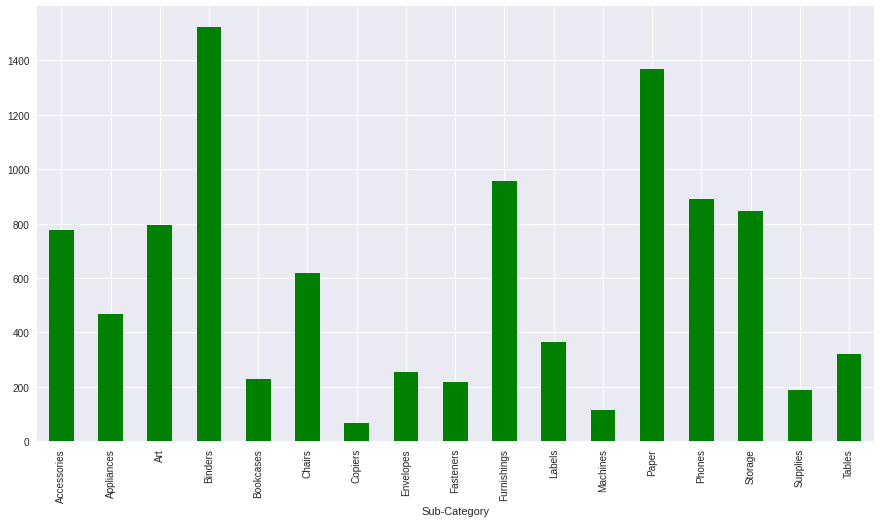

In [31]:
plt.figure(figsize=(15,8))
prod_sub.size().plot.bar(color=['green'])

In [32]:
furn = df[df['Category'] == 'Furniture']
furn_sub = furn.groupby('Sub-Category')
furn_sub.size()

Sub-Category
Bookcases      228
Chairs         617
Furnishings    957
Tables         319
dtype: int64

<ipython-input-33-1bea587ec8b1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  furn_sub['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Sub-Category'>

<Figure size 720x432 with 0 Axes>

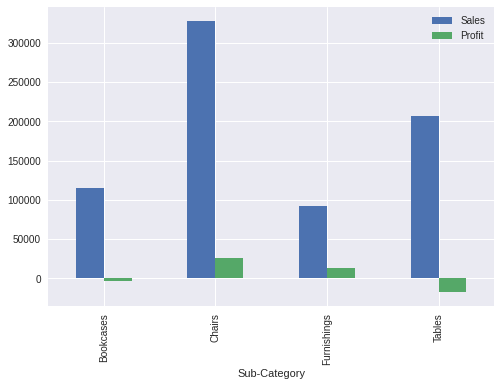

In [33]:
plt.figure(figsize=(10,6))
furn_sub['Sales','Profit'].sum().plot.bar()

While analyzing Furniture category we can see that there is very high sales 
but profit is very low even negative in the case of Tables.                             
Reason for this can be high discounts in Furniture.                                   
So we need to analyze discounts given on Furniture.

<AxesSubplot:xlabel='Sub-Category'>

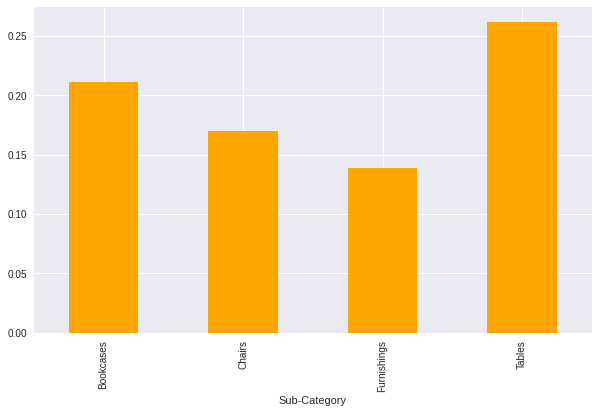

In [34]:
plt.figure(figsize=(10,6))
furn_sub['Discount'].mean().plot.bar(color=['orange'])

In [35]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

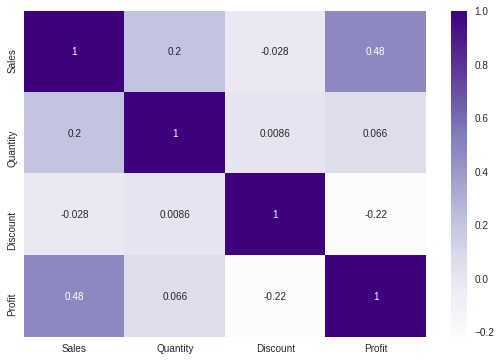

In [36]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sn.heatmap(df.corr(),annot = True, cmap = 'Purples')

We can see that there is a negative correlation between discount and profit.                     
Which implies if discounts are increased profit will fall and vice versa.

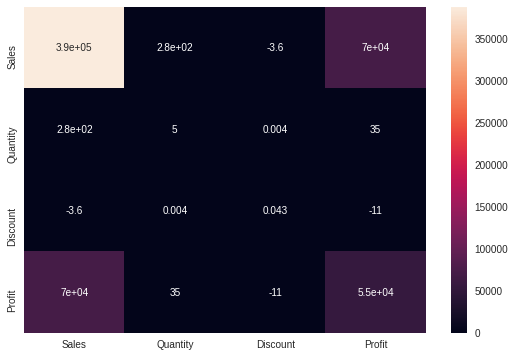

In [37]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sn.heatmap(df.cov(), annot= True)
plt.show()

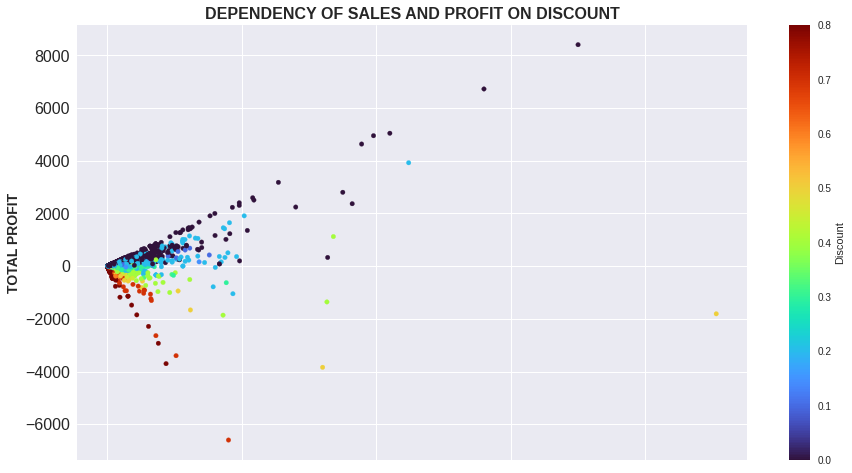

In [38]:
df.plot(kind = 'scatter', figsize = (15,8) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , 
        fontsize = 16 , colormap = 'turbo')
plt.ylabel('TOTAL PROFIT', fontsize = 14,fontweight = 'bold',)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16,fontweight = 'bold',)
plt.show()

The scatter plot shows that as Discount rises Profit decreases and falls below 0                    
which implies that a loss is being incurred.

<AxesSubplot:xlabel='Sub-Category'>

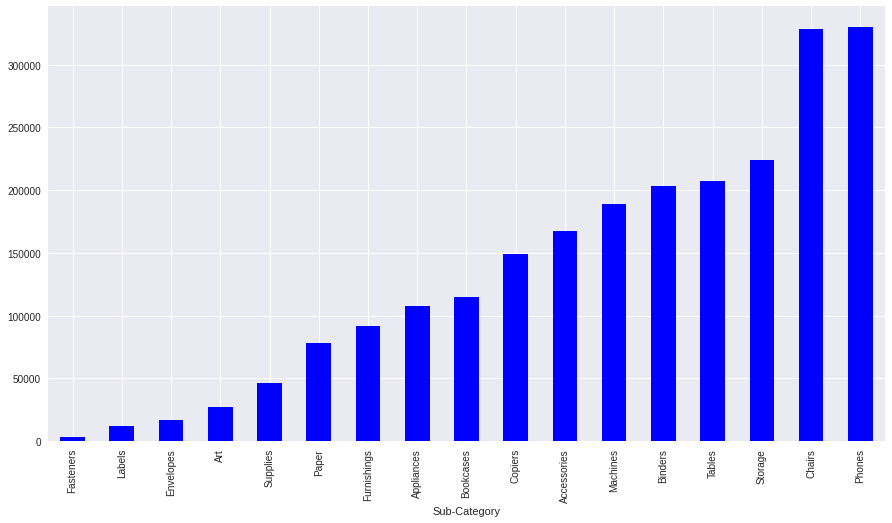

In [39]:
plt.figure(figsize=(15,8))
prod_sub['Sales'].sum().sort_values().plot.bar(color=['blue'])

This graph shows the items with highest and lowest sales.

<AxesSubplot:xlabel='Sub-Category'>

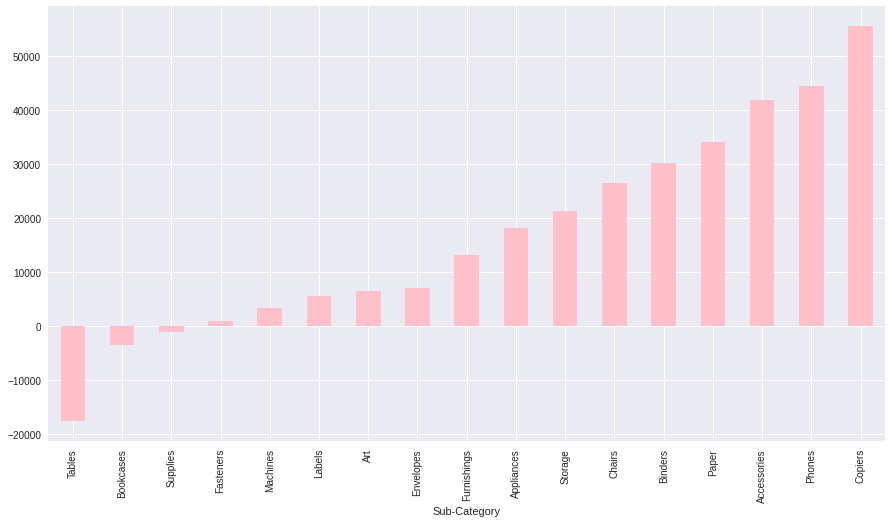

In [40]:
plt.figure(figsize=(15,8))
prod_sub['Profit'].sum().sort_values().plot.bar(color=['pink'])

This graph shows items giving highest and lowest profits and losses.

# Observations

1. We observed that majority of shipments were made through Standard Class to each segment of customers.           
2. Majority of buyers were direct customers followed by corporate and home office.                             
3. Maximum number of transactions were made in the western region which also recorded highest sales and profits.   
4. Maximum sales and profit were recorded by the technology category.                                         
5. While furniture category also recorded higher sales but the profit was significantly low.                        6. The most probable reason was found to be high discounts in this category.                           
7. In the furniture category tables and bookcases are incurring losses.                                    
8. There is a positive correltion between sales and profit.                                      
9. But there is a negative correlation between discount and profit.                                    
10. Thus, if discounts are decreased profit can increase in this category and ultimately for thre store. 

# Conclusion

From the above observations it is concluded that Furniture is the weak area of the store 
which needs to be worked upon.                                              
Due to high discounts in tables and bookcases profit is falling despite high sales. 
So the discount rates for these products need to be decreased so that profit increases.

# Thank You